# Google Code Jam 2020 qualification round 1A analysis

https://codingcompetitions.withgoogle.com/codejam/round/000000000019fd74

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', 500)
plt.style.use('ggplot')  # set style

In [3]:
df = pd.read_json(r'./crawler/round_1a_by_rank.json').T

Total: 9410


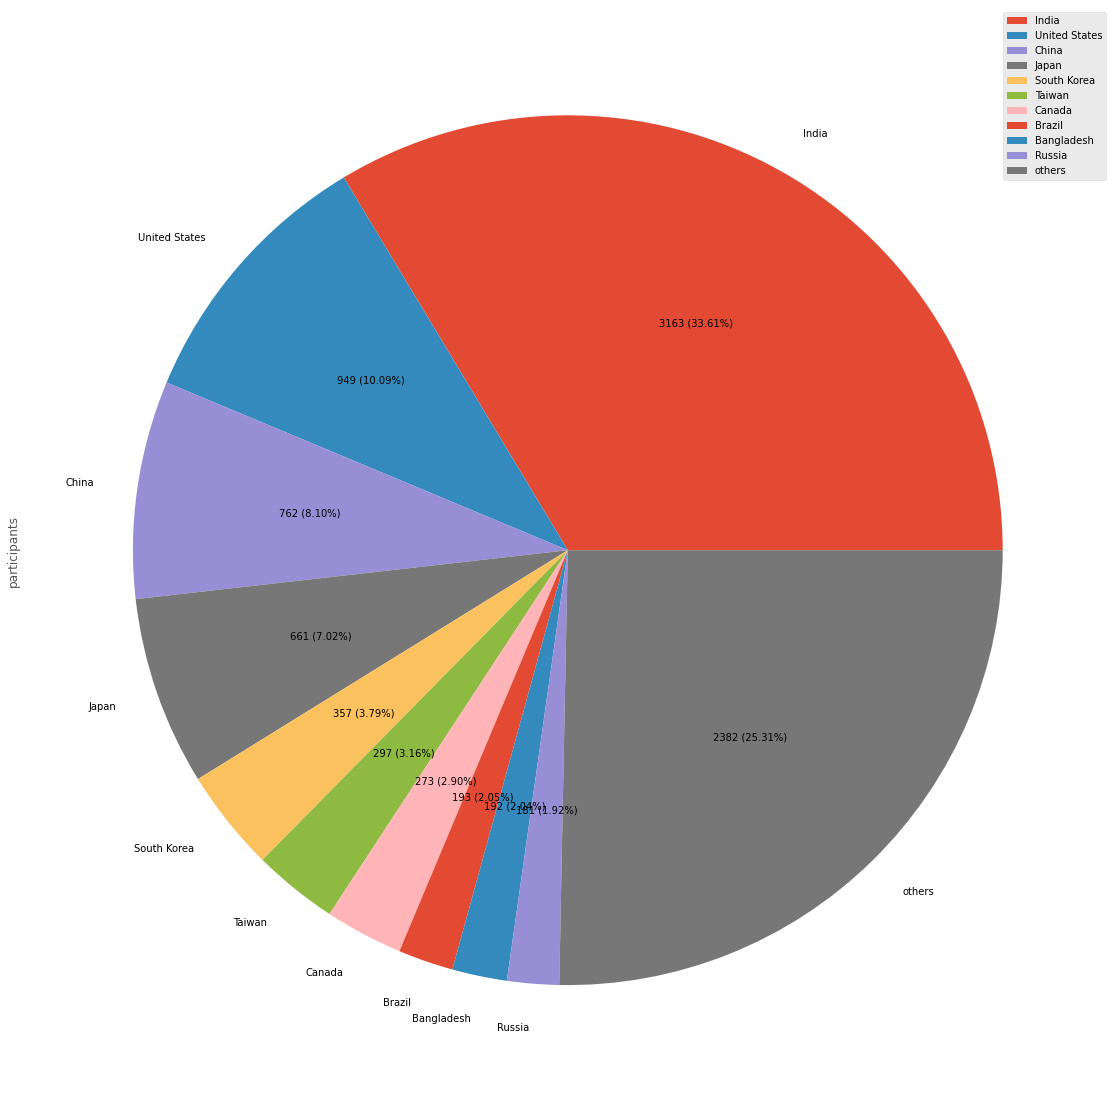

In [10]:
# group country by participants
df_countries = df.groupby(['country']).size().sort_values(ascending=False).reset_index(name='participants')

# get df: country with top 10 participants
df_countries_top = df_countries[:10].copy()

# get df: rest population in rest countries (one row)
df_countries_others = pd.DataFrame(
    data = {
        'country': ['others'],
        'participants' : [df_countries['participants'][10:].sum()]
    },
    index = ['10']                             
)

# combine above two df
countries_simple = pd.concat([df_countries_top, df_countries_others]).set_index('country')

# draw it
total = countries_simple.sum().participants
countries_simple.plot.pie(
    autopct=lambda p: '{:.0f} ({:.2f}%)'.format(p * total / 100, p),
    y='participants',
    figsize=(20, 20)
)
print(f'Total: {total}')

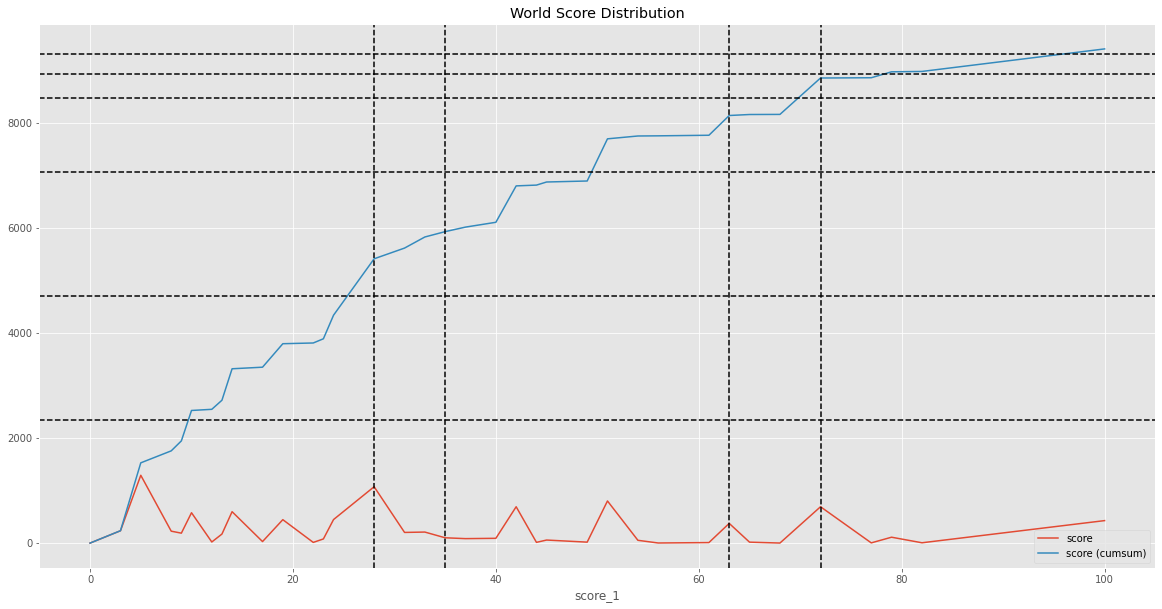

In [11]:
# get score count and score cumsum
df_score = df.groupby(['score_1']).size().reset_index(name='score')
df_score['score (cumsum)'] = df_score['score'].cumsum()

# draw line chart
line_chart = df_score.plot.line(x='score_1', figsize=(20,10), title='World Score Distribution')

# draw iconic score lines
vlines = [
    28,  # first question
    35,  # second question
    63,  # first question + second question
    72,  # first question + second question + third question 1 test case
]
for vl in vlines:
    line_chart.axvline(vl, color='k', linestyle='--')

# 25%, 50%, 75%, 90%, 95%, 99%
total = countries_simple.sum().participants
hlines = [total/4, total/2, 3*total/4, 9*total/10, 95*total/100, 99*total/100]
for hl in hlines:
    line_chart.axhline(hl, color='k', linestyle='--')

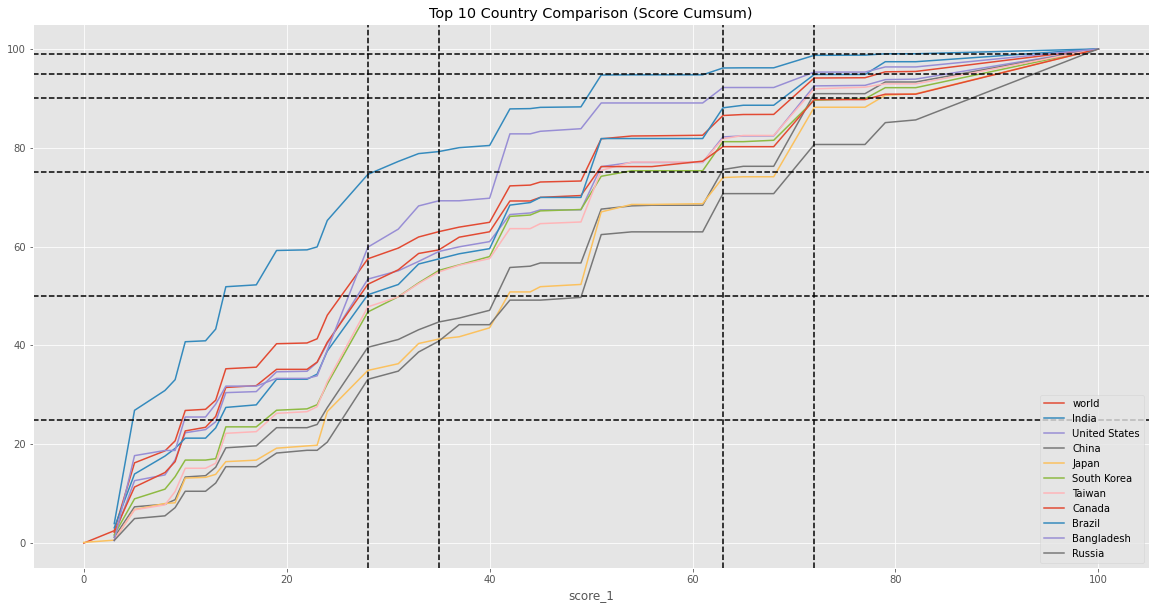

In [12]:
# calculate percentage of world score cumsum distribution
df_cnt = df.sort_values(by='rank').groupby(['score_1']).size().reset_index(name='count_world')
df_cnt['world'] = 100 * df_cnt['count_world'].cumsum() / df_cnt['count_world'].sum()
del df_cnt['count_world']

# calculate percentage of score cumsum distribution by country
for cc in df_countries_top['country']:
    df_country = df[df.country == cc].sort_values(by='rank')
    df_country_cnt = df_country.groupby(['score_1']).size().reset_index(name='count_' + cc)
    df_country_cnt[cc] = 100 * df_country_cnt['count_' + cc].cumsum() / df_country_cnt['count_' + cc].sum()
    del df_country_cnt['count_' + cc]
    df_cnt = pd.merge(df_cnt, df_country_cnt, how='left', on=['score_1']).fillna(method='ffill')

line_chart = df_cnt.plot.line(x='score_1', figsize=(20,10), title='Top 10 Country Comparison (Score Cumsum)')
vlines = [
    28,  # first question
    35,  # second question
    63,  # first question + second question
    72,  # first question + second question + third question 1 test case
]
for vl in vlines:
    line_chart.axvline(vl, color='k', linestyle='--')
hlines = [25, 50, 75, 90, 95, 99]
for hl in hlines:
    line_chart.axhline(hl, color='k', linestyle='--')

**Notes**

- Steep line means worse performance, vice versa.

(0.0, 20.0)

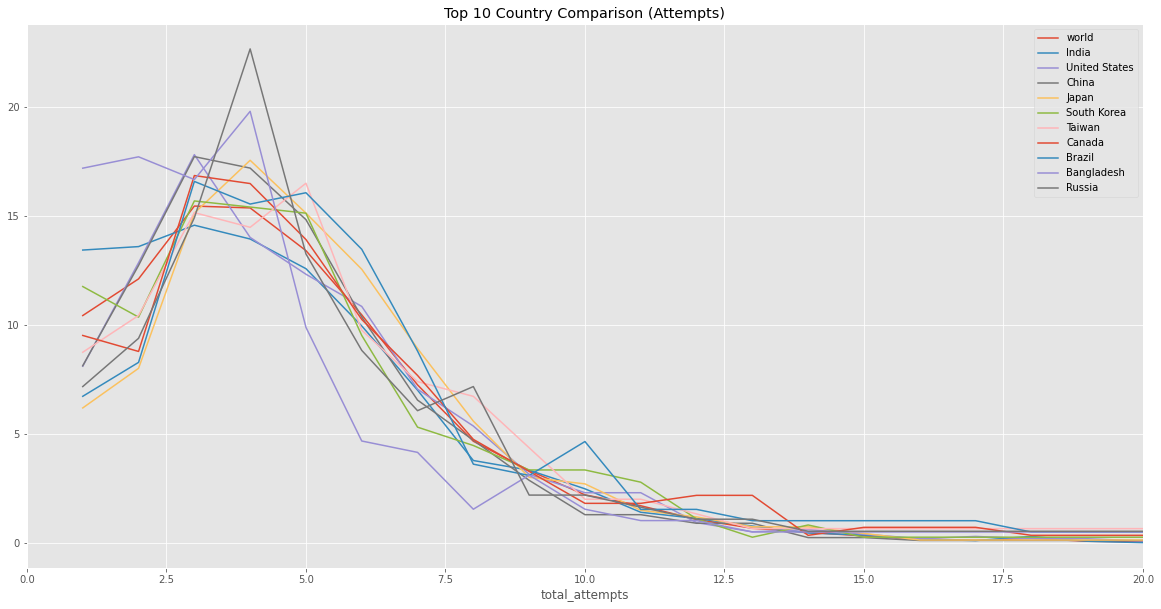

In [16]:
# calculate world total attempts distribution
df_acnt = df.groupby(['total_attempts']).size().reset_index(name='count_world')
df_acnt['world'] = 100 * df_acnt['count_world'] / df_acnt['count_world'].sum()
del df_acnt['count_world']

# calculate total attempts distribution by country
for cc in df_countries_top['country']:
    df_country = df[df.country == cc].sort_values(by='rank')
    df_country_acnt = df_country.groupby(['total_attempts']).size().reset_index(name='count_' + cc)
    df_country_acnt[cc] = 100 * df_country_acnt['count_' + cc] / df_country_acnt['count_' + cc].sum()
    del df_country_acnt['count_' + cc]
    df_acnt = pd.merge(df_acnt, df_country_acnt, how='left', on=['total_attempts']).fillna(method='ffill')

line_chart = df_acnt.plot.line(x='total_attempts', figsize=(20,10), title='Top 10 Country Comparison (Attempts)')
line_chart.set_xlim(0, 20)  # ignore attempts more than 30 times

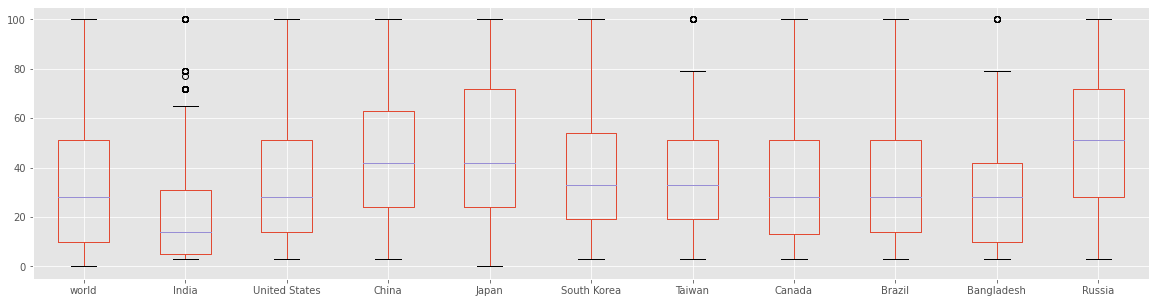

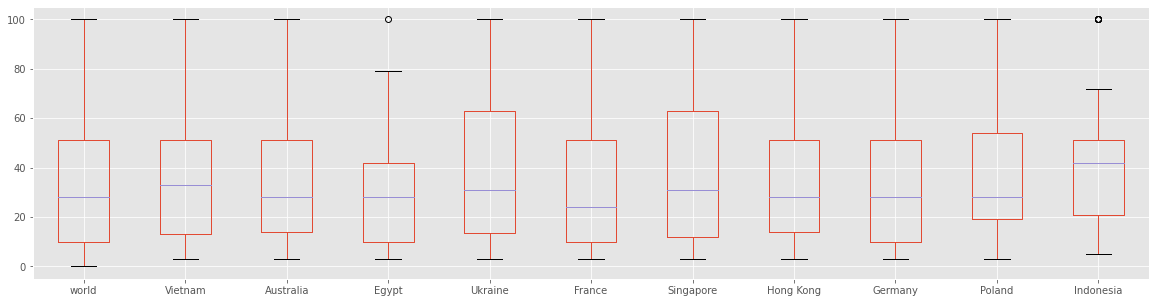

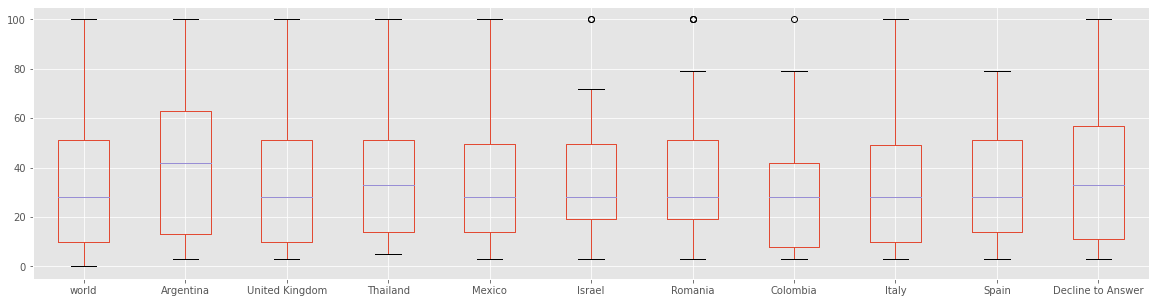

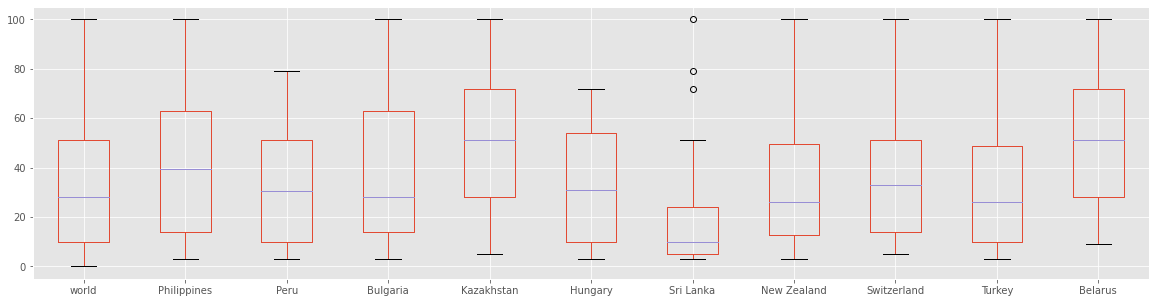

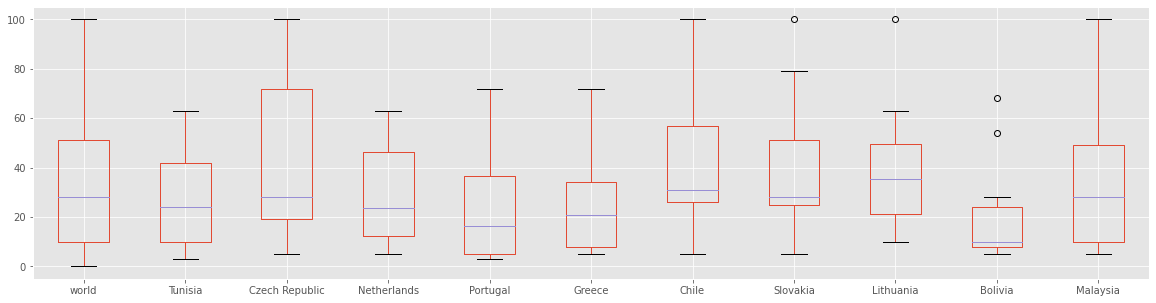

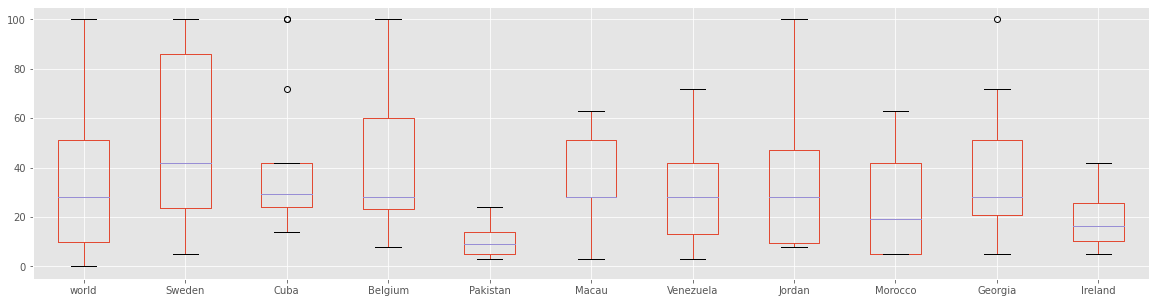

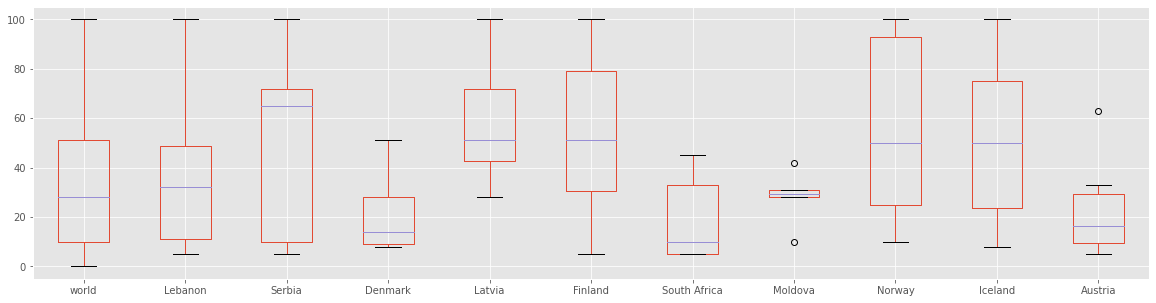

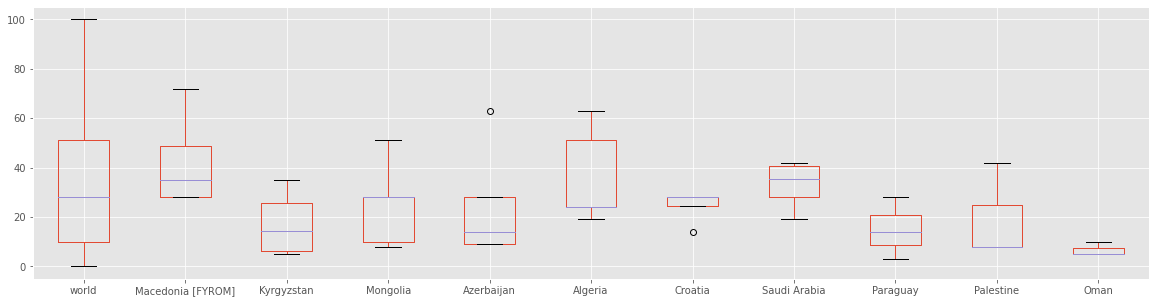

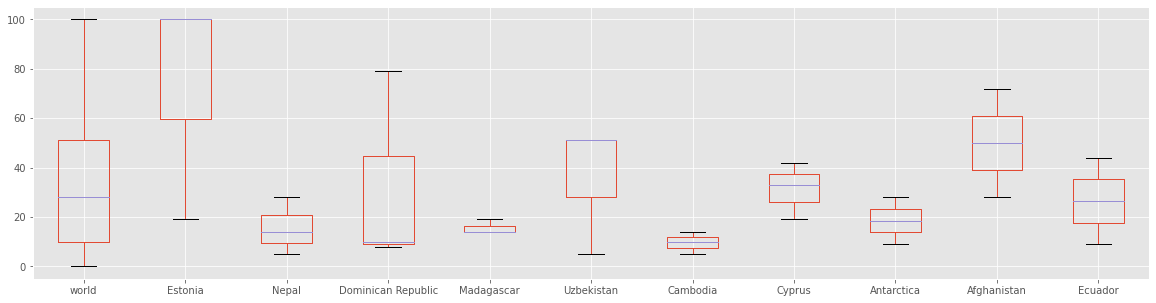

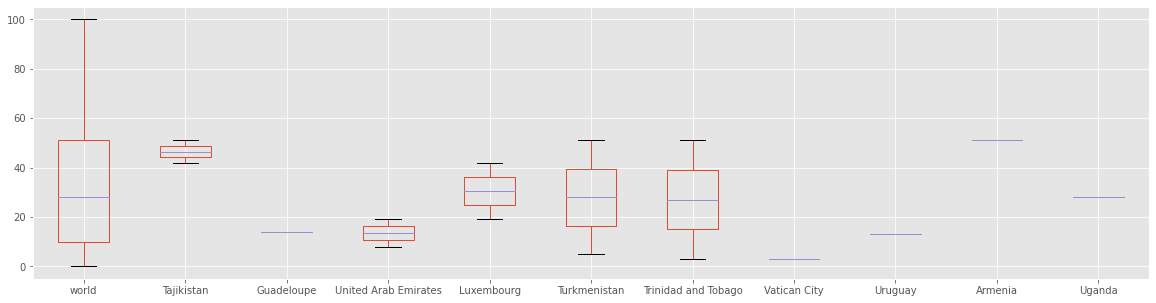

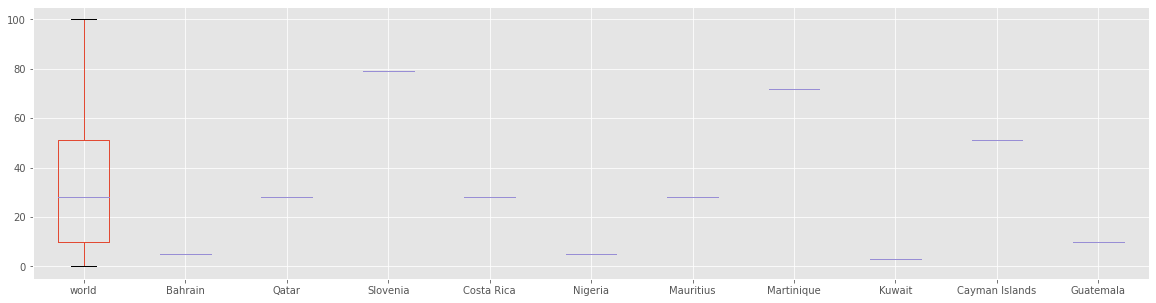

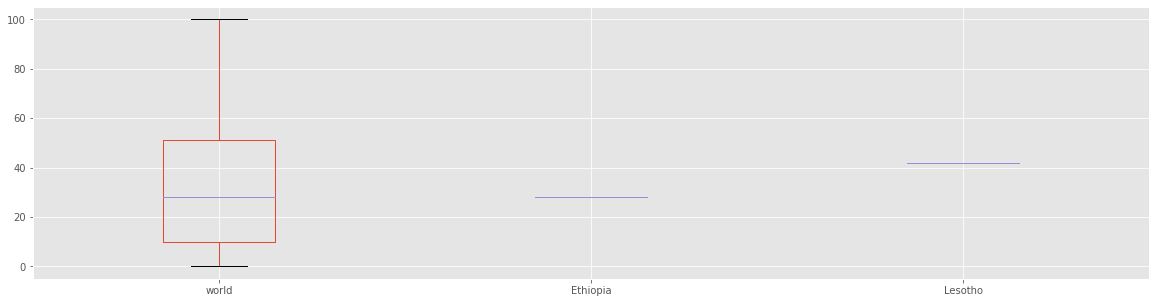

In [14]:
# calculate world score distribution
df_scores = pd.DataFrame(df['score_1'])
df_scores.columns = ['world']
df_base_scores = df_scores.copy()

# calculate score distribution by country
for idx, cc in enumerate(df_countries['country']):
    df_country = df[df.country == cc].sort_values(by='rank')
    df_scores_country = pd.DataFrame(df_country['score_1'])
    df_scores_country.columns = [cc]
    df_scores = df_scores.merge(df_scores_country, left_index=True, right_index=True, how='outer')

    # print 10 box in each figure
    if (idx + 1) % 10 == 0 or idx == len(df_countries) - 1:
        ax = df_scores.plot.box(figsize=(20, 5))
        df_scores = df_base_scores

**Notes**

- Each figure shows 10 countries plus world box.
- The country name is ordered by "participants numbers" rather than alphabets.
- Box length means "most people reaching certain range of score". Country with small length box like Japan, Vietnam, and South Korea means "most people's score are between x and y, x and y are very close.", vice versa.